In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib as ilib
import random
from typing import *

import sys
import os
sys.path.append(os.path.abspath("../frbfuncs")) # add frbfuncs folder as a possible candidate to search functions
import cosmology as c
import ktau as kt
import sim

In [3]:
#if necessary
ilib.reload(sim)

<module 'sim' from '/Users/williamhuang/Documents/GitHub/FRB Project/frbfuncs/sim.py'>

# Power Law Sample Test

### Create one Power Law Sample
Functions from sim package used in this section:
- sim.rndm(a, b, g, size, seed)
- sim.get_expected(l, r, a, b, g, n)

In [4]:
## compare random samples to theoretical distribution to see whether or not this random thing works

# generate data
n = 100000 #number of data points in sample
seed = 0
a, b, g = 2, 6, -1.1 #left end, right end, power in power law distribution
data = sim.rndm(a, b, g, size=n, seed=seed) #generate data
print(f'{n} points generated')

# plot parameters
bins = 100 # number of bins in histogram

edges = np.linspace(a, b, bins+1) #edges
l, r = edges[:-1], edges[1:] #left edges vs right edges
x = (l+r)/2 # average of left and right edges; this gives central values
pdf = sim.get_expected(l, r, a, b, g, n) #expected number of points per bin
print(f'theoretical number of points: {sum(pdf)}') #confirm # of total points is identical

100000 points generated
theoretical number of points: 99999.99999999996


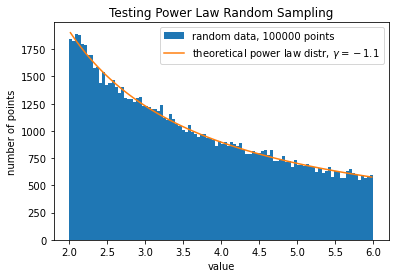

In [5]:
#plot histogram of data vs. expected
plt.hist(data, bins=bins, label=f'random data, {n} points')
plt.plot(x, pdf, label=f'theoretical power law distr, $\gamma={g}$')
plt.title('Testing Power Law Random Sampling')
plt.ylabel('number of points')
plt.xlabel('value')
plt.legend()
#plt.savefig("../Results/sim graphs 09.14.22/power_law_test.png", dpi=1000)
plt.show()

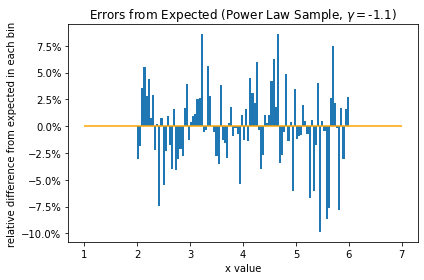

In [6]:
# plot errors
from matplotlib.ticker import PercentFormatter

counts, bin_edges = np.histogram(data, bins=bins) #identical to above plot

fig = plt.figure()
ax = plt.subplot()

ax.bar(x, (counts-pdf)*100/pdf, width=(b-a)/bins)
ax.hlines(0, a-1, b+1, colors='orange')
ax.set_title(f'Errors from Expected (Power Law Sample, $\gamma=${g})')
ax.set_ylabel('relative difference from expected in each bin')
ax.set_xlabel('x value')
ax.yaxis.set_major_formatter(PercentFormatter()) #adds % to y axis
plt.tight_layout() #so that axis labels don't get cut off in saved figure
#plt.savefig('../Results/sim graphs 09.14.22/power_law_error.png', dpi=1000)
plt.show()

In [7]:
#confirm that errors add up to ~0
sum(counts-pdf)

-6.821210263296962e-13

### Verify Counts in Log-log Plot
The original distribution is $p(x) \propto x^\gamma$. For small bins, the bin width is $dx$ and each bin has roughly $p(x) \mathrm dx$ counts. In a log-log plot, each bin has width roughly $\mathrm d \log x \propto \mathrm dx/x = \mathrm{const}$, which results in each $dx = x \cdot \mathrm{const}$, and the distribution effectively becoming $p'(x) \propto x^{\gamma+1}$. Therefore, a log-log plot should display a slope of $\gamma+1$.

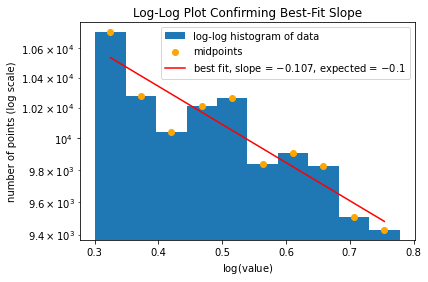

In [40]:
counts, bin_edges = np.histogram(np.log10(data), bins=10)
plt.hist(np.log10(data), bins=10, label='log-log histogram of data')
plt.scatter((bin_edges[:-1]+bin_edges[1:])/2, counts, color='orange', label='midpoints')

x = (bin_edges[:-1]+bin_edges[1:])/2
y = np.log10(counts)
a, b = np.polyfit(x, y, 1)
plt.plot(x, np.power(10, a*x+b), color='red', label=f'best fit, slope = ${round(a,3)}$, expected = ${round(g+1,3)}$')
plt.yscale('log')
plt.title('Log-Log Plot Confirming Best-Fit Slope')
plt.ylabel('number of points (log scale)')
plt.xlabel('$\\log(\mathrm{value})$')
plt.legend()
#plt.savefig('../Results/sim graphs 09.14.22/power_law_log-log.png', dpi=1000)

# Lognormal Test
Since we're using numpy's built-in function, the accuracy of the function has little doubt. We will not be performing rigorous tests here, just a visual confirmation.

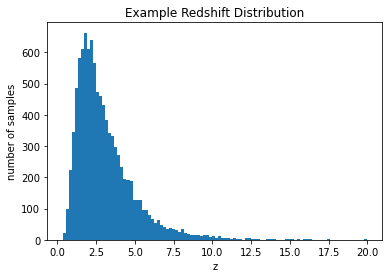

In [41]:
rng = np.random.default_rng(0)
ztest = rng.lognormal(mean=0.9, sigma=0.6, size=10000)+0.1
plt.hist(ztest, bins=100)
plt.title('Example Redshift Distribution')
plt.ylabel('number of samples')
plt.xlabel('z')
plt.show()